In [86]:
import pandas as pd
from __future__ import division
%matplotlib inline

In [3]:
df1 = pd.read_csv('titanic.csv')

In [8]:
df1.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S


In [9]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [45]:
# 1. How many passengers are in our passenger list? From here forward, we’ll assume our dataset represents the full passenger list for the Titanic.
print len(df1.PassengerId)
print len(set(df1.PassengerId)) # check for duplicates

891
891


Survival Rate: 38.38%


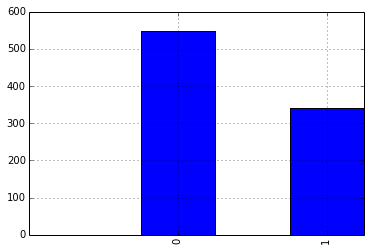

In [94]:
# 2. What is the overall survival rate?
print "Survival Rate: {:.2f}%".format(len(df1[df1.Survived==True]) / len(df1)*100)
df1.Survived.value_counts().plot(kind='bar')


577


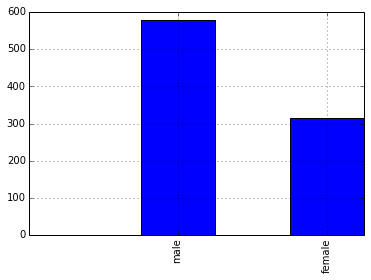

In [95]:
# 3. How many male passengers were onboard?
print len(df1[df1.Sex=="male"])
df1.Sex.value_counts().plot(kind='bar')

In [44]:
# 4. How many female passengers were onboard?
print len(df1[df1.Sex=="female"])

In [62]:
# 5. What is the overall survival rate of male passengers?
maleSurvive = len(df1[(df1.Sex=="male") & (df1.Survived==True)])
print "Male survival Rate: {:.2f}%".format(maleSurvive/len(df1[df1.Sex=="male"])*100)

Male survival Rate: 18.89%


In [60]:
# 6. What is the overall survival rate of female passengers?
femaleSurvive = len(df1[(df1.Sex=="female") & (df1.Survived==True)])
print "Female survival Rate: {:.2f}%".format(femaleSurvive/len(df1[df1.Sex=="female"])*100)

Female survival Rate: 74.20%


Mean Age: 29.70
Median Age: 28.00


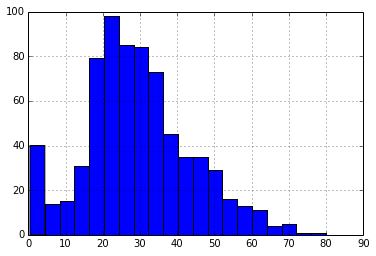

In [101]:
# 7. What is the average age of all passengers onboard?
#    How did you calculate this average age?
#    Note that some of the passengers do not have an age value. How did you deal with this? What are some other ways of dealing with this?
print "Mean Age: {:.2f}".format(df1.Age.mean())
print "Median Age: {:.2f}".format(df1.Age.median())
df1.Age.hist(bins=20)

Mean Age of passengers who survived: 28.34


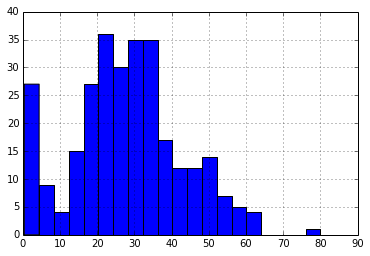

In [97]:
# 8. What is the average age of passengers who survived?
print "Mean Age of passengers who survived: {:.2f}".format(df1[df1.Survived==True].Age.mean())
df1[df1.Survived==True].Age.hist(bins=20)

Mean Age of passengers who did not survive: 30.63


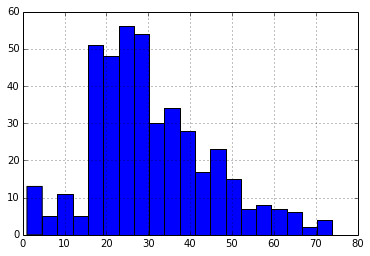

In [98]:
# 9. What is the average age of passengers who did not survive?
print "Mean Age of passengers who did not survive: {:.2f}".format(df1[df1.Survived==False].Age.mean())
df1[df1.Survived==False].Age.hist(bins=20)

In [81]:
# 10. At this (early) point in our analysis, what might you infer about any patterns you are seeing?
"Women survived at a higher rate than men. Younger passengers survived at a slightly higher rate than older passengers"

3    491
1    216
2    184
dtype: int64


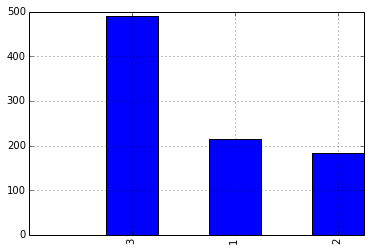

In [121]:
# 11. How many passengers are in each of the three classes of service (e.g. First, Second, Third?)
print df1.Pclass.value_counts()
df1.Pclass.value_counts().plot(kind='bar')

In [126]:
# 12. What is the survival rate for passengers in each of the three classes of service?
print df1.groupby(['Pclass']).Survived.mean()

Pclass
1         0.629630
2         0.472826
3         0.242363
Name: Survived, dtype: float64


In [127]:
# 13. What else might you conclude?
"passengers in higher classes have a better chance of survival"


'passengers in higher classes have a better chance of survival'

In [ ]:
# 14. Last, if we were to build a predictive model, which features in the data do you think we should include in the model and which can we leave out? Why?
# PassengerId	Survived	Pclass	Name	Sex	Age	SibSp	Parch	Ticket	Fare	Cabin	Embarked
'''we would want to exclude features that are unique, like passengerId, ticket, and name.  
The remaining features we should investigate using to see what correlations exist.'''